# Experimenting with Times FM

In [ ]:
%%capture
!pip install timesfm[pax] dask[dataframe]

### Load Times FM 2.0 500M



In [ ]:
import numpy as np

In [ ]:
import timesfm

tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=128,
          num_layers=50,
          context_len=2048,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

torch_model.ckpt:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

### Create dummy time series

In [ ]:
forecast_input = [np.sin(np.linspace(0, 20, 100)),
    np.sin(np.linspace(0, 20, 200)),
    np.sin(np.linspace(0, 20, 400)),
]
frequency_input = [0, 0, 0]

### Forecast

In [ ]:
point_forecast, experimental_quantile_forecast = tfm.forecast(
    inputs=forecast_input,
    freq=frequency_input,
)

In [ ]:
print(point_forecast.shape)

(3, 128)


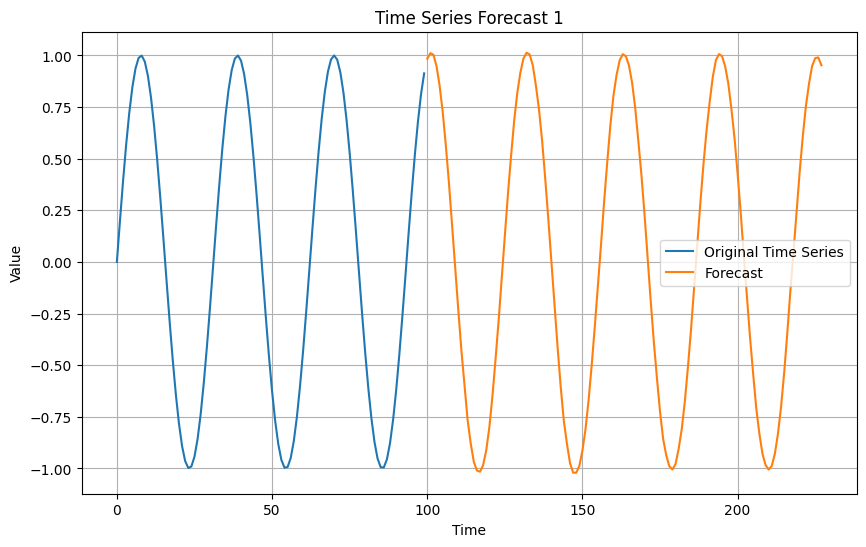

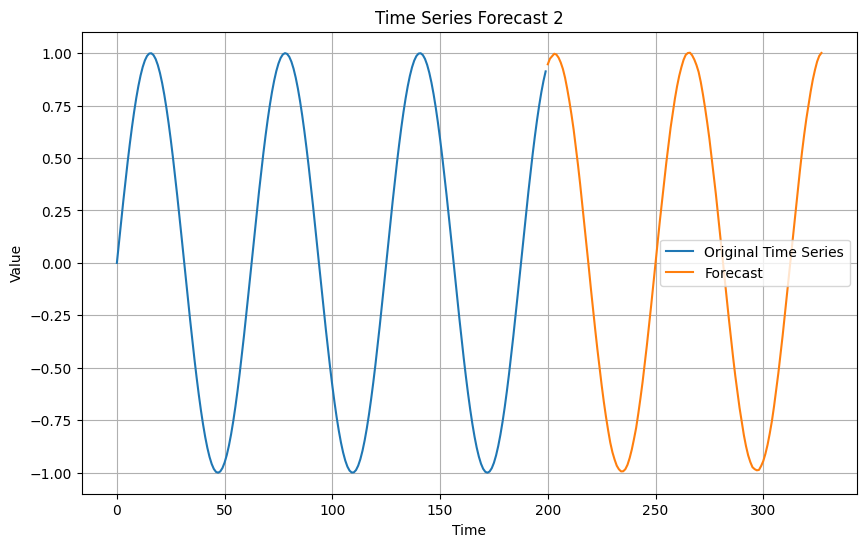

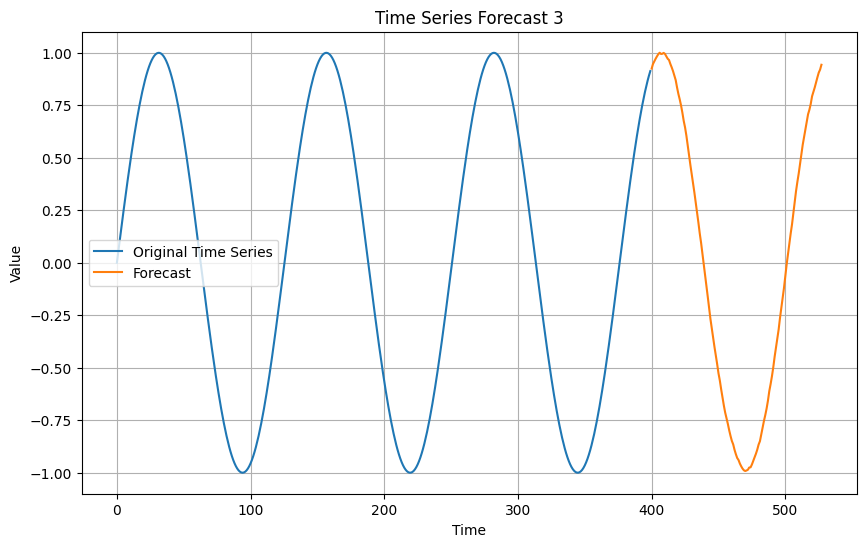

In [ ]:
# prompt: draw time-series

import matplotlib.pyplot as plt

# Assuming point_forecast contains the forecasted values and forecast_input the original data
# and they have compatible shapes. Adjust accordingly if needed.

for i in range(len(forecast_input)):
  plt.figure(figsize=(10, 6))
  plt.plot(forecast_input[i], label='Original Time Series')
  plt.plot(np.arange(len(forecast_input[i]), len(forecast_input[i]) + len(point_forecast[i])), point_forecast[i], label='Forecast')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title(f'Time Series Forecast {i+1}')
  plt.legend()
  plt.grid(True)
  plt.show()